In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
'''
Splits our data into train and test sets.
'''
def train_test_data(features, labels):
  x_train, x_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.1, stratify=labels
  )

  return x_train, x_test, y_train, y_test

'''
Perform zero-mean and unit-variance standardization.
'''
def standardize_data(x_train, x_test):
  scaler = StandardScaler()

  # fit our scaler on the training data
  scaler.fit(x_train)

  # transform our train and test data on the fitted weights
  x_train_std = scaler.transform(x_train)
  x_test_std = scaler.transform(x_test)

  return x_train_std, x_test_std



df = pd.read_csv('banknotes.csv')
print(df)

# ".values" to change from panda's dataframe 
# data structure to numpy's array
data = df.values

# These two columns are not our features:
#   - our label (at last column)
#   - running number (at first column)
features = data[:,1:-1]

# The last column, that specifies Genuine or Counterfeit,
# contains our labels 
labels = data[:,-1]

x_train, x_test, y_train, y_test = train_test_split(
    features, labels, test_size = 0.1, stratify=labels)

# standardize our data
x_train_std, x_test_std = standardize_data(x_train, x_test)

    Sample  Length   Left  Right  Bottom   Top  Diagonal  Genuine
0      BN1   214.8  131.0  131.1     9.0   9.7     141.0        1
1      BN2   214.6  129.7  129.7     8.1   9.5     141.7        1
2      BN3   214.8  129.7  129.7     8.7   9.6     142.2        1
3      BN4   214.8  129.7  129.6     7.5  10.4     142.0        1
4      BN5   215.0  129.6  129.7    10.4   7.7     141.8        1
..     ...     ...    ...    ...     ...   ...       ...      ...
195  BN196   215.0  130.4  130.3     9.9  12.1     139.6        0
196  BN197   215.1  130.3  129.9    10.3  11.5     139.7        0
197  BN198   214.8  130.3  130.4    10.6  11.1     140.0        0
198  BN199   214.7  130.7  130.8    11.2  11.2     139.4        0
199  BN200   214.3  129.9  129.9    10.2  11.5     139.6        0

[200 rows x 8 columns]


In [3]:

'''
Perform one-hot encoding on a list of labels.
'''
def to_onehot(arr):
    onehot = []

    for label in arr:
        if label == 0:
            _1hot = [1, 0]
        elif label == 1:
            _1hot = [0, 1]
        
        onehot.append(_1hot)

    # converting from python list to numpy array
    return np.array(onehot)

# perform one-hot encoding
y_train_1hot = to_onehot(y_train)
y_test_1hot = to_onehot(y_test)

In [4]:

'''
Create our Neural Network model.
'''
def create_model(n_features):
  model = tf.keras.Sequential()

  # add a layer with 100 neurons
  model.add(tf.keras.layers.Dense(units=50, 
      input_shape=(n_features,), activation='relu'))

  # add a second layer with 20 neurons
  model.add(tf.keras.layers.Dense(units=20, 
      input_shape=(n_features,), activation='relu'))

  # 'softmax' becauses we are doing classification.
  # a sample can only fall into one of the 2 classes. 
  model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

  # use 'categorical_crossentropy' for our loss calcuation
  model.compile(optimizer='adam', loss='categorical_crossentropy', 
      metrics=['accuracy'])

  return model

# create and train our model       
model = create_model(
    x_train_std.shape[1]    # no. of features used for training 
) 

In [5]:


'''
Train our model.

Returns the 'history' of our training, which has the loss 
and accuracy details for each epoch.
'''
def train_model(model, x_train, y_train_1hot):
  return model.fit(x_train, y_train_1hot, epochs=50)


hist = train_model(model, x_train_std, y_train_1hot)

Epoch 1/50
1/6 [====>.........................] - ETA: 0s - loss: 0.7750 - accuracy: 0.4375

2023-01-13 13:55:47.758458: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


6/6 [==============================] - 0s 918us/step - loss: 0.7355 - accuracy: 0.4667
Epoch 2/50
6/6 [==============================] - 0s 756us/step - loss: 0.5942 - accuracy: 0.6833
Epoch 3/50
6/6 [==============================] - 0s 827us/step - loss: 0.4844 - accuracy: 0.9167
Epoch 4/50
6/6 [==============================] - 0s 863us/step - loss: 0.3967 - accuracy: 0.9778
Epoch 5/50
6/6 [==============================] - 0s 790us/step - loss: 0.3259 - accuracy: 0.9944
Epoch 6/50
6/6 [==============================] - 0s 687us/step - loss: 0.2674 - accuracy: 0.9944
Epoch 7/50
6/6 [==============================] - 0s 809us/step - loss: 0.2191 - accuracy: 0.9944
Epoch 8/50
6/6 [==============================] - 0s 742us/step - loss: 0.1788 - accuracy: 0.9944
Epoch 9/50
6/6 [==============================] - 0s 601us/step - loss: 0.1460 - accuracy: 0.9944
Epoch 10/50
6/6 [==============================] - 0s 716us/step - loss: 0.1194 - accuracy: 0.9944
Epoch 11/50
6/6 [=============

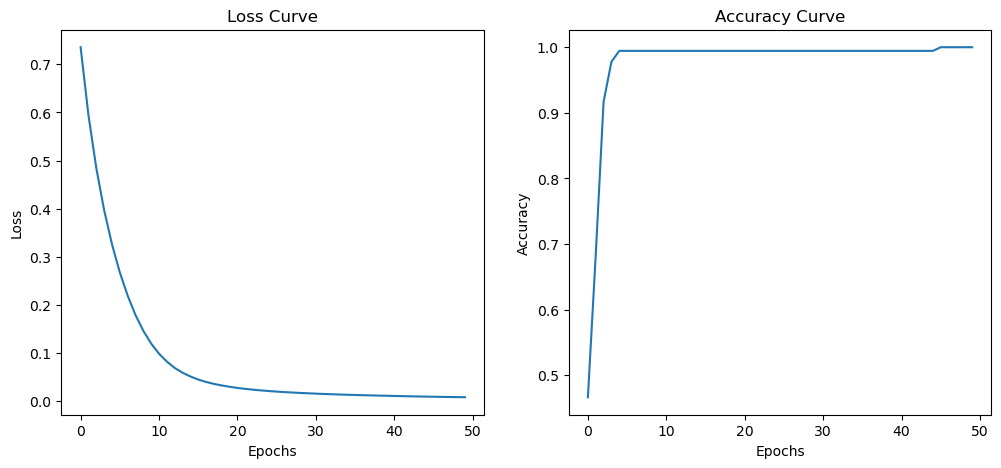

In [6]:
'''
Create loss and accuracy plots.
'''
def plot(hist):
  _, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

  ax[0].plot(hist.history['loss'])
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss')
  ax[0].set_title('Loss Curve')

  ax[1].plot(hist.history['accuracy'])
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Accuracy')
  ax[1].set_title('Accuracy Curve')

  plt.show()    

# loss and accuracy plots
plot(hist)


In [7]:
'''
Automatic evaluation of our model against test set
'''
def auto_eval(model, x_test, y_test_1hot):
  loss, accuracy = model.evaluate(x=x_test, y=y_test_1hot)

  print('loss = ', loss)
  print('accuracy = ', accuracy)    

# tensorflow will do auto-evaluation of model against test set
auto_eval(model, x_test_std, y_test_1hot)

1/1 [==============================] - 0s 65ms/step - loss: 0.0112 - accuracy: 1.0000
loss =  0.01121542789041996
accuracy =  1.0
